<a href="https://colab.research.google.com/github/Siwenli0615/General/blob/main/exercises/10_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy exercises

---
These are introductory exercises in Python with focus in **Numpy**.

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your answers in a neat way using <b>f-strings</b>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Dice simulations (*)

Simulations of one die,  

&nbsp; a) Calculate theoretical mean of a dice (six-sided) (*)

&nbsp; b) Now do simulations of

- 10
- 100
- 1000
- 10000
- 100000
- 1000000
- 10000000

number of dices and plot their means. (*)

<details>

<summary>Answer </summary>

a)
```
3.5
```

b)

<img src="https://github.com/aleylani/Python/blob/main/assets/numpy_1b.png?raw=1" width = 300>

</details>




In [2]:
# a)

mean = sum([x for x in range(1,7)])/6
print(mean)

3.5


In [31]:
import numpy as np

# for 10 cast
simulation = 1000000
dice_outcome = np.random.randint(1,7,simulation)
mean = sum(dice_outcome)/simulation



mean = np.random.randint(1,7,simulation).mean()
print(mean)



3.500591


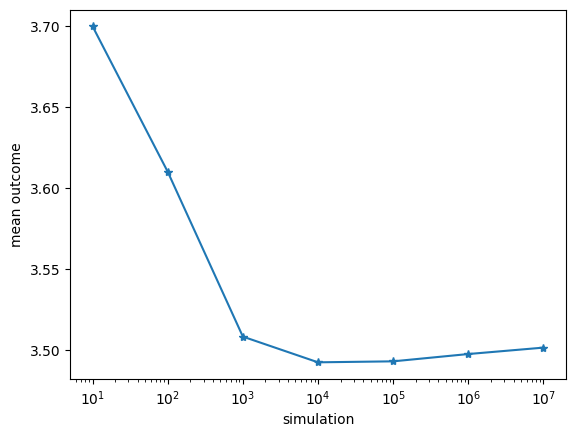

In [50]:
# for 10,100,1000,10000,100000,1000000,10000000 casts
import matplotlib.pyplot as plt

simulation = [10,100,1000,10000,100000,1000000,10000000]

mean_outcome = [np.random.randint(1,7,i).mean() for i in simulation]


plt.xlabel("simulation")
plt.ylabel("mean outcome")
xvalue = simulation
yvalue = mean_outcome
plt.xscale('log')

plt.plot(xvalue,yvalue,'-*')



In [ ]:
for i in simulation:
  np.random.randint(1,6,i)


---
## 2. Several dices (**)

&nbsp; a) Make a sample space for the sum of two dices, i.e. all possible outcomes of these dices. (*)

&nbsp; b) Count the number of each values in the sample space (*)

&nbsp; c) Now calculate the frequency $f_i$ for each unique value. Also check that the sum of frequencies sums to 1, i.e. $\sum_i f_i = 1$. (*)

&nbsp; d) Make a bar chart of the sum of two dices, with frequencies in y and unique values in x. This is a probability distribution of the sum of your two dices. (*)

&nbsp; e) Now make barplots in subplots of sum of dices for 1 dice, 2 dices, 3 dices and 4 dices. What is the pattern that you see? (**)

<details>

<summary>Hint</summary>

a)

Here are some potentially useful methods:

```py

np.meshgrid(), np.add.reduce(), np.unique()

```

c)

Divide by the total number of outcomes


</details>

<details>

<summary>Answer</summary>


a)

Sample space

```
[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]
```

b)

Unique values:
```
[ 2  3  4  5  6  7  8  9 10 11 12]
```

Count:
```
[1 2 3 4 5 6 5 4 3 2 1]
```

c)

```
[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]
```

d)


<img src="https://github.com/aleylani/Python/blob/main/assets/numpy2d.png?raw=1" width = 300>


e)

<img src="https://github.com/aleylani/Python/blob/main/assets/numpy2e.png?raw=1" width = 500>


We see that when we sum several uniformly distributed random variables we will approach the normal distribution. This is called the central limit theorem, which we will come back to in the statistics course.

</details>

In [66]:
#a)
import numpy as np

result = [[x+y for x in range(1,7)]for y in range(1,7)]


[[2, 3, 4, 5, 6, 7],
 [3, 4, 5, 6, 7, 8],
 [4, 5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9, 10],
 [6, 7, 8, 9, 10, 11],
 [7, 8, 9, 10, 11, 12]]

In [86]:
#b) tolkar som att man slår 2 tärningar t.ex. 100 ggr och hur många ggr av varje resultat
result_unique = np.unique(result)
#print(result_unique)

#print(result.count(3))
result_array = np.array(result).flatten()
count_value = np.bincount(result_array-2)
print(count_value)
#print(result_array.count(2))
#print(result)



[1 2 3 4 5 6 5 4 3 2 1]
